# Практическая работа №6
## Тема: «Алгоритмы кластеризации. K-средних (K-means)»
### Выполнил студент: Ефименко Александр
#### ВАРИАНТ: 6 (ваш dataset [название, ссылка])

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 1 - Iris-setosa
# 2 - Iris-versicolor
# 3 - Iris-virginica

#### Работа с датасетом Iris

In [40]:
df = pd.read_excel("Iris.xlsx", sheet_name="Iris")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [41]:
# Преобразование категориальных переменных в числовые
df = pd.get_dummies(df, drop_first=True)

In [103]:
# Выбор признаков
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[features]

# Определение количества кластеров
k = 3

# Создание и обучение модели K-means
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)

C:\Users\2_EfRoLine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\2_EfRoLine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [104]:
# Получение меток кластеров для каждого цветка
labels = model.labels_

# Добавление меток кластеров в исходный датафрейм
df['Cluster'] = labels

# Вывод первых нескольких строк датафрейма с метками кластеров
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0   1            5.1           3.5            1.4           0.2   
1   2            4.9           3.0            1.4           0.2   
2   3            4.7           3.2            1.3           0.2   
3   4            4.6           3.1            1.5           0.2   
4   5            5.0           3.6            1.4           0.2   

   Species_Iris-versicolor  Species_Iris-virginica  Cluster  
0                    False                   False        1  
1                    False                   False        1  
2                    False                   False        1  
3                    False                   False        1  
4                    False                   False        1  


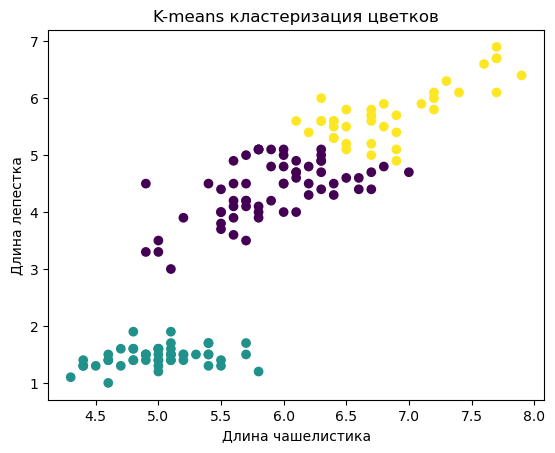

In [105]:
# Визуализация кластеров
plt.scatter(df['SepalLengthCm'], df['PetalLengthCm'], c=labels, cmap='viridis')
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')
plt.title('K-means кластеризация цветков')
plt.show()

In [114]:
# Вычисление внутрикластерного расстояния
inertia = model.inertia_
print(f"Внутрикластерное расстояние: {inertia}")

# Вычисление коэффициента силуэта
silhouette = silhouette_score(X, model.labels_)
print(f"Коэффициент силуэта: {silhouette}")

Внутрикластерное расстояние: 78.94084142614602
Коэффициент силуэта: 0.5525919445499756


#### Работа с своим датасетом

In [22]:
mydf = pd.read_excel("My_DataSet(Super_Racing).xlsx", sheet_name="1")
mydf

,ID,Name_Cards,Quality,0-100,Power,Max_Speed,Engine_Capacity,Weight,Cost,Received
0,1,Alfa Romeo Montreal,2,7.2,200.0,224.0,2593.0,1270.0,7300.0,0
1,2,Экстренная остановка,1,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,Alfa Romeo Spider,2,7.2,264.0,245.0,3196.0,1685.0,53800.0,0
3,4,Audi A4 Allroad,2,6.9,211.0,232.0,1984.0,1650.0,48800.0,0
4,5,BMW 3.0 CSL,2,7.3,206.0,217.0,3003.0,1270.0,9500.0,0
...,...,...,...,...,...,...,...,...,...,...
255,256,KTM X-Bow 300,2,3.9,240.0,220.0,1984.0,790.0,64500.0,0
256,257,Вынужденная остановка,1,NaN,NaN,NaN,NaN,NaN,NaN,0
257,258,Bowler Wildcat,2,5.8,275.0,210.0,4600.0,1850.0,60000.0,0
258,259,Ford Sierra Cosworth RS500,2,6.1,220.0,248.0,1993.0,1240.0,30000.0,0


In [24]:
mydf_del = mydf.dropna()
mydf_del

,ID,Name_Cards,Quality,0-100,Power,Max_Speed,Engine_Capacity,Weight,Cost,Received
0,1,Alfa Romeo Montreal,2,7.2,200.0,224.0,2593.0,1270.0,7300.0,0
2,3,Alfa Romeo Spider,2,7.2,264.0,245.0,3196.0,1685.0,53800.0,0
3,4,Audi A4 Allroad,2,6.9,211.0,232.0,1984.0,1650.0,48800.0,0
4,5,BMW 3.0 CSL,2,7.3,206.0,217.0,3003.0,1270.0,9500.0,0
5,6,BMW Z4 Roadster,2,4.8,340.0,250.0,2979.0,1580.0,95000.0,0
...,...,...,...,...,...,...,...,...,...,...
254,255,Jeep Grand Cherokee,2,10.5,210.0,180.0,3701.0,2079.0,40200.0,1
255,256,KTM X-Bow 300,2,3.9,240.0,220.0,1984.0,790.0,64500.0,0
257,258,Bowler Wildcat,2,5.8,275.0,210.0,4600.0,1850.0,60000.0,0
258,259,Ford Sierra Cosworth RS500,2,6.1,220.0,248.0,1993.0,1240.0,30000.0,0


In [47]:
# Преобразование категориальных переменных в числовые
mydf_del = pd.get_dummies(mydf_del, drop_first=True)

In [88]:
# Выбор признаков
my_features = ['Quality', '0-100', 'Power', 'Max_Speed', 'Engine_Capacity', 'Weight', 'Cost', 'Received']
X1 = mydf_del[my_features]

# Определение количества кластеров
k1 = 3

# Создание и обучение модели K-means
model1 = KMeans(n_clusters=k1, random_state=42)
model1.fit(X1)

C:\Users\2_EfRoLine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\2_EfRoLine\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [89]:
# Получение меток кластеров для каждого автомобиля
labels1 = model1.labels_

# Добавление меток кластеров в исходный датафрейм
mydf_del['Cluster'] = labels1

# Вывод первых нескольких строк датафрейма с метками кластеров
print(mydf_del.head())

   ID  Quality  0-100  Power  Max_Speed  Engine_Capacity  Weight     Cost  \
0   1        2    7.2  200.0      224.0           2593.0  1270.0   7300.0   
2   3        2    7.2  264.0      245.0           3196.0  1685.0  53800.0   
3   4        2    6.9  211.0      232.0           1984.0  1650.0  48800.0   
4   5        2    7.3  206.0      217.0           3003.0  1270.0   9500.0   
5   6        2    4.8  340.0      250.0           2979.0  1580.0  95000.0   

   Received  Cluster  ...  Name_Cards_Volkswagen Scirocco R  \
0         0        1  ...                             False   
2         0        1  ...                             False   
3         0        1  ...                             False   
4         0        1  ...                             False   
5         0        1  ...                             False   

   Name_Cards_Volkswagen Tiguan  Name_Cards_Volkswagen Touareg  \
0                         False                          False   
2                         

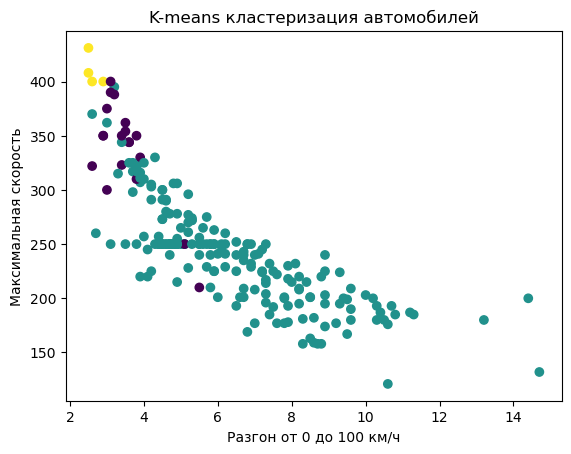

In [109]:
# Визуализация кластеров
plt.scatter(mydf_del['0-100'], mydf_del['Max_Speed'], c=labels1, cmap='viridis')
plt.xlabel('Разгон от 0 до 100 км/ч')
plt.ylabel('Максимальная скорость')
plt.title('K-means кластеризация автомобилей')
plt.show()

In [112]:
# Вычисление внутрикластерного расстояния
inertia1 = model1.inertia_
print(f"Внутрикластерное расстояние: {inertia1}")

# Вычисление коэффициента силуэта
silhouette1 = silhouette_score(X1, model1.labels_)
print(f"Коэффициент силуэта: {silhouette1}")

Внутрикластерное расстояние: 3196179279868.3467
Коэффициент силуэта: 0.8247094155046268
